In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
# Basic EDA, cleaning, and visualization modules

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests
# Webscraping 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
# Modeling



In [44]:
movie_path = "./IMDb movies.csv"
rating_path = "./IMDb ratings.csv"
original_path = "./title.ratings.tsv"
name_path= "./name.basics.tsv"

df_movie = pd.read_csv(movie_path, index_col=0)
df_rating = pd.read_csv(rating_path, index_col=0)

#df_movie.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
#df_rating.head()

In [46]:
#mvdatatype= df_movie.dtypes


In [47]:
#rdatatype = df_rating.dtypes


In [48]:
df_rating_new =df_rating[["weighted_average_vote", "total_votes", "mean_vote"]]

#df_rating_new.head()

In [49]:
imdb_df= pd.concat([df_rating_new, df_movie ],axis=1)
imdb_df.head(1)

,weighted_average_vote,total_votes,mean_vote,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,,,,
tt0000009,5.9,154,5.9,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0


In [50]:
print(imdb_df.isnull().sum())


weighted_average_vote        0
total_votes                  0
mean_vote                    0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64


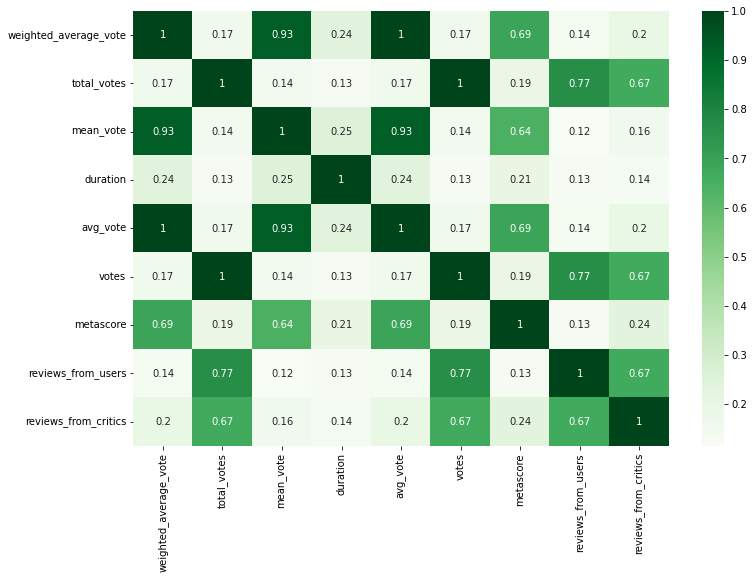

In [51]:
corr = imdb_df.corr()
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)

In [52]:
# Drop the null rows
# May be drop "title" "original title" "date published" "description". , "date_published" , "budget", "description", "metascore", "avg_vote", "mean_vote", "title"
imdb_df =imdb_df.drop(["usa_gross_income","worlwide_gross_income", "date_published" , "budget", "description", "metascore", "avg_vote", "mean_vote", "title", "original_title"], axis=1)

imdb_df.shape
imdb_df.head()


,weighted_average_vote,total_votes,year,genre,duration,country,language,director,writer,production_company,actors,votes,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,
tt0000009,5.9,154,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",154,1.0,2.0
tt0000574,6.1,589,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",589,7.0,7.0
tt0001892,5.8,188,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",188,5.0,2.0
tt0002101,5.2,446,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",446,25.0,3.0
tt0002130,7.0,2237,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",2237,31.0,14.0


In [53]:
imdb_df.nunique()


weighted_average_vote       89
total_votes              14933
year                       168
genre                     1257
duration                   266
country                   4907
language                  4377
director                 34733
writer                   66859
production_company       32050
actors                   85729
votes                    14933
reviews_from_users        1213
reviews_from_critics       595
dtype: int64

In [54]:
country_counts = imdb_df.country.value_counts()
country_counts

USA                                         28511
India                                        6065
UK                                           4111
Japan                                        3077
France                                       3055
                                            ...  
Turkey, Cyprus, Italy                           1
Ecuador, Mexico, Germany                        1
UK, USA, South Africa, Germany                  1
West Germany, France, Poland, Yugoslavia        1
UK, Peru, Portugal, Spain                       1
Name: country, Length: 4907, dtype: int64

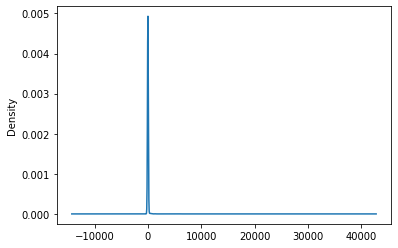

In [55]:
country_counts.plot.density()


In [56]:
imdb_df = imdb_df.dropna()
imdb_df.shape

(66258, 14)

**Country Encoding**

In [57]:
# Encoding without splitting the Country 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4 = imdb_df.copy()
df4['country'] = le.fit_transform(df4['country'])

df4.head(1)

,weighted_average_vote,total_votes,year,genre,duration,country,language,director,writer,production_company,actors,votes,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,
tt0000009,5.9,154,1894,Romance,45,3798,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",154,1.0,2.0


In [58]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(imdb_df.country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['country'])
encode_df.head()

,"country_Afghanistan, France","country_Afghanistan, France, Germany, UK","country_Afghanistan, Iran","country_Afghanistan, Ireland, Japan, Iran, Netherlands",country_Albania,"country_Albania, Italy, Kosovo","country_Albania, USA",country_Algeria,"country_Algeria, Belgium, France","country_Algeria, France","country_Algeria, France, Germany","country_Algeria, France, Germany, Switzerland","country_Algeria, France, Morocco, Belgium","country_Algeria, Italy","country_Angola, France","country_Angola, France, Portugal","country_Angola, Portugal","country_Angola, Portugal, Brazil",country_Argentina,"country_Argentina, Belgium","country_Argentina, Brazil","country_Argentina, Brazil, France","country_Argentina, Brazil, France, Germany, Spain, UK","country_Argentina, Brazil, France, Netherlands, Germany, Belgium, Switzerland","country_Argentina, Brazil, France, Poland, Germany, Denmark","country_Argentina, Brazil, Spain","country_Argentina, Brazil, Spain, Dominican Republic, France, Netherlands, Mexico, Switzerland, USA, Portugal, Lebanon","country_Argentina, Canada","country_Argentina, Canada, Italy","country_Argentina, Canada, Uruguay, Spain","country_Argentina, Chile","country_Argentina, Chile, France, Netherlands","country_Argentina, Chile, France, South Korea","country_Argentina, Chile, Germany, Netherlands","country_Argentina, Chile, Peru","country_Argentina, Chile, Spain","country_Argentina, Colombia","country_Argentina, Colombia, France, Poland, Germany","country_Argentina, Cuba, Switzerland, Germany","country_Argentina, Denmark, France, Mexico, USA, Germany, Brazil, Netherlands",...,"country_West Germany, Italy, Yugoslavia, France","country_West Germany, Mexico","country_West Germany, Netherlands","country_West Germany, Peru","country_West Germany, Philippines","country_West Germany, Portugal","country_West Germany, Portugal, France, Netherlands","country_West Germany, South Africa","country_West Germany, Soviet Union","country_West Germany, Spain","country_West Germany, Spain, Italy","country_West Germany, Spain, Liechtenstein","country_West Germany, Spain, Portugal","country_West Germany, Spain, UK","country_West Germany, Spain, USA","country_West Germany, Switzerland","country_West Germany, Switzerland, Hungary","country_West Germany, Switzerland, Italy","country_West Germany, UK","country_West Germany, USA","country_West Germany, USA, Italy, France","country_West Germany, USA, UK","country_West Germany, Yugoslavia","country_West Germany, Yugoslavia, USA",country_Yemen,country_Yugoslavia,"country_Yugoslavia, Croatia","country_Yugoslavia, Czechoslovakia","country_Yugoslavia, Czechoslovakia, Hungary, West Germany","country_Yugoslavia, France","country_Yugoslavia, France, USA","country_Yugoslavia, Hungary, Austria, West Germany","country_Yugoslavia, Italy","country_Yugoslavia, Italy, France, USA","country_Yugoslavia, Italy, West Germany, USA","country_Yugoslavia, UK","country_Yugoslavia, USA","country_Yugoslavia, USA, Liechtenstein","country_Yugoslavia, West Germany","country_Zambia, Sweden"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [59]:
country_split = imdb_df['country'].str.split(',', expand=True)
country_split=country_split[0]
country_split

imdb_title_id
tt0000009            USA
tt0000574      Australia
tt0002101            USA
tt0002130          Italy
tt0002199            USA
                ...     
tt9898858            USA
tt9900060          Japan
tt9900782          India
tt9904802             UK
tt9911196    Netherlands
Name: 0, Length: 66258, dtype: object

In [60]:
imdb_df= pd.concat([imdb_df, country_split ],axis=1)
imdb_df = imdb_df.drop(["country"], axis=1)
imdb_df= imdb_df.rename({0: "country"}, axis='columns')

imdb_df.head(1)

,weighted_average_vote,total_votes,year,genre,duration,language,director,writer,production_company,actors,votes,reviews_from_users,reviews_from_critics,country
imdb_title_id,,,,,,,,,,,,,,
tt0000009,5.9,154,1894,Romance,45,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",154,1.0,2.0,USA


In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df6 = imdb_df.copy()
df6['country'] = le.fit_transform(df6['country'])
imdb_df=df6
imdb_df.head(1)

,weighted_average_vote,total_votes,year,genre,duration,language,director,writer,production_company,actors,votes,reviews_from_users,reviews_from_critics,country
imdb_title_id,,,,,,,,,,,,,,
tt0000009,5.9,154,1894,Romance,45,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",154,1.0,2.0,140


**Genre** **Encoding**

In [62]:
# Encoding without splitting the Genre 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3 = imdb_df.copy()
df3['genre'] = le.fit_transform(df3['genre'])

df3.head(1)
#df2= df2.drop(["Genre2", "Genre3"], axis=1)
#df2

,weighted_average_vote,total_votes,year,genre,duration,language,director,writer,production_company,actors,votes,reviews_from_users,reviews_from_critics,country
imdb_title_id,,,,,,,,,,,,,,
tt0000009,5.9,154,1894,1074,45,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",154,1.0,2.0,140


In [63]:
genre_split = imdb_df['genre'].str.split(',', expand=True)


In [64]:
genre_split.isnull().sum()

0        0
1    18373
2    39643
dtype: int64

In [65]:
#genre_split.rename(columns={"0": "Genre1", "1": "Genre2", "2": "Genre3"})
genre_split= genre_split.rename({0: "Genre1",1: "Genre2", 2: "Genre3"}, axis='columns')
genre_split.head()

,Genre1,Genre2,Genre3
imdb_title_id,,,
tt0000009,Romance,None,None
tt0000574,Biography,Crime,Drama
tt0002101,Drama,History,None
tt0002130,Adventure,Drama,Fantasy
tt0002199,Biography,Drama,None


In [66]:
# Encoding after spliting the Genre into 3 columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = genre_split.copy()
df2['Genre1'] = le.fit_transform(df2['Genre1'])

df2.head()
df2= df2.drop(["Genre2", "Genre3"], axis=1)
df2

,Genre1
imdb_title_id,
tt0000009,16
tt0000574,3
tt0002101,7
tt0002130,1
tt0002199,3
...,...
tt9898858,0
tt9900060,2
tt9900782,0


In [67]:
#Adding the encoded split genre1 and removing the original genre
imdb_df= pd.concat([imdb_df, df2 ],axis=1)
imdb_df = imdb_df.drop(["genre"], axis=1)
imdb_df.head(1)

,weighted_average_vote,total_votes,year,duration,language,director,writer,production_company,actors,votes,reviews_from_users,reviews_from_critics,country,Genre1
imdb_title_id,,,,,,,,,,,,,,
tt0000009,5.9,154,1894,45,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",154,1.0,2.0,140,16


**Language**

In [68]:
language_split = imdb_df['language'].str.split(',', expand=True)
language_split=language_split[0]
language_split.head()

imdb_title_id
tt0000009       None
tt0000574       None
tt0002101    English
tt0002130    Italian
tt0002199    English
Name: 0, dtype: object

In [69]:
imdb_df= pd.concat([imdb_df, language_split ],axis=1)
imdb_df = imdb_df.drop(["language"], axis=1)
imdb_df= imdb_df.rename({0: "language"}, axis='columns')

imdb_df.head(1)

,weighted_average_vote,total_votes,year,duration,director,writer,production_company,actors,votes,reviews_from_users,reviews_from_critics,country,Genre1,language
imdb_title_id,,,,,,,,,,,,,,
tt0000009,5.9,154,1894,45,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",154,1.0,2.0,140,16,None


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df5 = imdb_df.copy()
df5['language'] = le.fit_transform(df5['language'])

df5.head()
imdb_df=df5
#df5= df5.drop(["Genre2", "Genre3"], axis=1)
#df2

In [71]:
#List of Categorical columns to be used as features
cat_cols=["country","language","director","writer","production_company", "actors"]


In [72]:

imdb_df= imdb_df.drop(["director","writer","production_company", "actors", "votes"], axis=1) 
imdb_df 

,weighted_average_vote,total_votes,year,duration,reviews_from_users,reviews_from_critics,country,Genre1,language
imdb_title_id,,,,,,,,,
tt0000009,5.9,154,1894,45,1.0,2.0,140,16,96
tt0000574,6.1,589,1906,70,7.0,7.0,7,3,96
tt0002101,5.2,446,1912,100,25.0,3.0,140,7,34
tt0002130,7.0,2237,1911,68,31.0,14.0,63,1,62
tt0002199,5.7,484,1912,60,13.0,5.0,140,3,34
...,...,...,...,...,...,...,...,...,...
tt9898858,5.1,10627,2020,88,388.0,64.0,140,0,34
tt9900060,6.9,103,2019,58,1.0,1.0,65,2,63
tt9900782,8.5,8400,2019,145,188.0,8.0,56,0,133


In [73]:
imdb_df[imdb_df.eq("TV Movie 2019").any(1)]

,weighted_average_vote,total_votes,year,duration,reviews_from_users,reviews_from_critics,country,Genre1,language
imdb_title_id,,,,,,,,,
tt8206668,7.1,23973,TV Movie 2019,108,135.0,98.0,140,3,34


In [74]:
imdb_df.replace({'year': {'tt8206668': '2019'}})

,weighted_average_vote,total_votes,year,duration,reviews_from_users,reviews_from_critics,country,Genre1,language
imdb_title_id,,,,,,,,,
tt0000009,5.9,154,1894,45,1.0,2.0,140,16,96
tt0000574,6.1,589,1906,70,7.0,7.0,7,3,96
tt0002101,5.2,446,1912,100,25.0,3.0,140,7,34
tt0002130,7.0,2237,1911,68,31.0,14.0,63,1,62
tt0002199,5.7,484,1912,60,13.0,5.0,140,3,34
...,...,...,...,...,...,...,...,...,...
tt9898858,5.1,10627,2020,88,388.0,64.0,140,0,34
tt9900060,6.9,103,2019,58,1.0,1.0,65,2,63
tt9900782,8.5,8400,2019,145,188.0,8.0,56,0,133


In [75]:
imdb_df.at['tt8206668', 'year'] = 2019

In [76]:
imdb_df[imdb_df.eq("TV Movie 2019").any(1)]

,weighted_average_vote,total_votes,year,duration,reviews_from_users,reviews_from_critics,country,Genre1,language
imdb_title_id,,,,,,,,,


In [77]:
X = imdb_df.copy()
X = X.drop("weighted_average_vote", axis=1)
X.head()


,total_votes,year,duration,reviews_from_users,reviews_from_critics,country,Genre1,language
imdb_title_id,,,,,,,,
tt0000009,154,1894,45,1.0,2.0,140,16,96
tt0000574,589,1906,70,7.0,7.0,7,3,96
tt0002101,446,1912,100,25.0,3.0,140,7,34
tt0002130,2237,1911,68,31.0,14.0,63,1,62
tt0002199,484,1912,60,13.0,5.0,140,3,34


In [78]:
y = imdb_df["weighted_average_vote"].ravel()
y[:5]

array([5.9, 6.1, 5.2, 7. , 5.7])

In [79]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [80]:
# Creating a StandardScaler instance.
from sklearn.preprocessing import StandardScaler,OneHotEncoder

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [81]:
# Create a random forest classifier.
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor(n_estimators=50, random_state=1)
rf_model1= RandomForestRegressor(n_estimators=100, random_state=1)
rf_model2= RandomForestRegressor(n_estimators=100, criterion='mae', random_state=1)
rf_model3= RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1)

In [82]:
rf_model = rf_model.fit(X_train_scaled, y_train)
rf_model1 = rf_model1.fit(X_train_scaled, y_train)
#rf_model2 = rf_model2.fit(X_train_scaled, y_train)
rf_model3 = rf_model3.fit(X_train_scaled, y_train)



In [83]:
# Making predictions using the testing data.
prediction1 = rf_model.predict(X_test_scaled)
prediction2 = rf_model1.predict(X_test_scaled)
#prediction3 = rf_model2.predict(X_test_scaled)
prediction4 = rf_model3.predict(X_test_scaled)

In [87]:

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction2))
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction3))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction4))

#print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction2)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction4)))

Mean Absolute Error: 0.6138431632961062
Mean Absolute Error: 0.6095859341986115
Mean Absolute Error: 0.6064124954936853
Root Mean Squared Error: 0.8343280288015185
Root Mean Squared Error: 0.8291849634745428
Root Mean Squared Error: 0.8228185994834702


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, y_train)
    scores.append(rf_model.score(X_test, y_test))
scores    

In [ ]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

In [ ]:
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


In [ ]:
Decision Tree
Random Forest - Michelle
Support Vector Machine - Wardah
Deep Learning- 
Ada Booster - Syed Bari
Linear regression- Ayoola
